Exercice 1
1. B-spline / bcurve
2. intervalle [0,5]


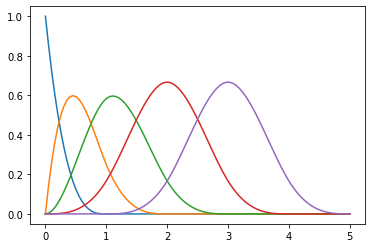

3. I-spline / icurve
4. intervalle [0,5]


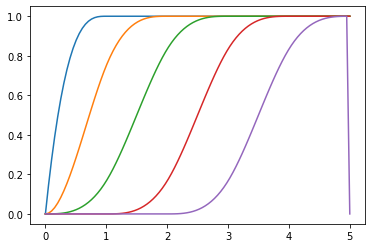

Exercice 2
1. Lissage polygone


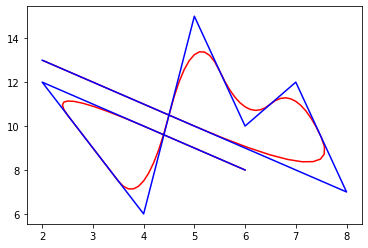

2. Modification point de controle


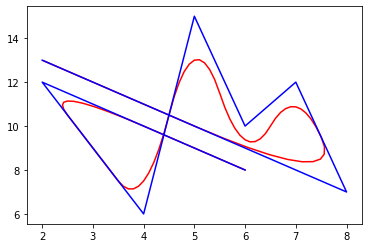

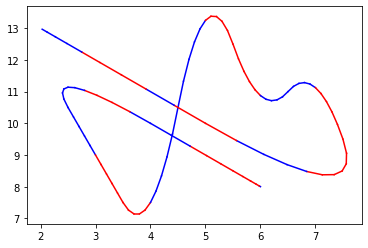

Exercice 3
Pour l’interpolation LAD


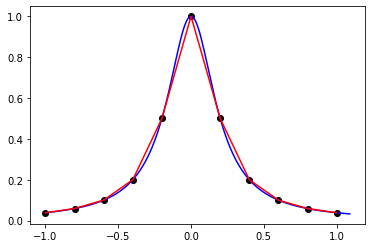

La courbe en bleu est la fonction, la courbe en rouge est l’interpolation LAD
Pour l’interpolation B-spline cubique


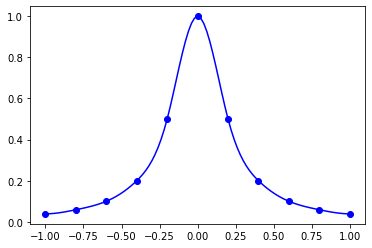

On remarque que l’interpolation par une coubre Spline cubique est beaucoup plus fidèle a la fonction  que l’interpolation LAD


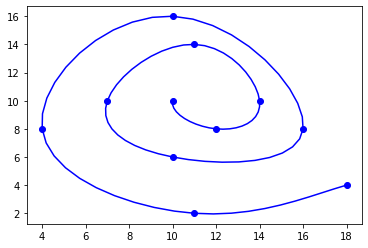

Exercice 4


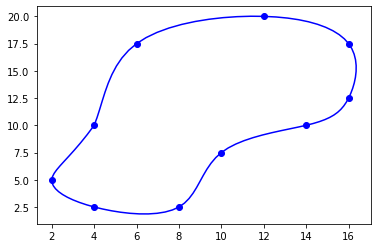

Aire de l'ile :  156.7603202244037
Exercice 5
pas 5 distance moyenne : 
8.920000000856021e-06


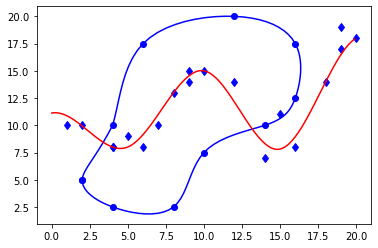

pas 3 distance moyenne : 
0.01296108232973452


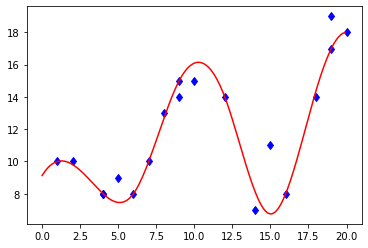

Exercice 6
20


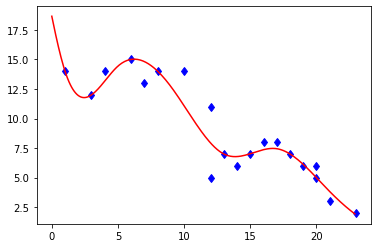

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as stat
from statistics import mean
#Exercice 1
# 1
print("Exercice 1")

print("1. B-spline / bcurve")

def B(x,i,k,u):
    if k == 0:
        if u[i]<=x<u[i+1]:
            return 1.0
        else:
            0.0
    if u[i+k]==u[i]:
        c1=0.0
    else:
        c1=(x-u[i])/(u[i+k]-u[i])*B(x,i,k-1,u)
    if u[i+k+1] == u[i+1]:
        c2=0.0
    else:
        c2=(u[i+k+1]-x)/(u[i+k+1]-u[i+1])*B(x,i+1,k-1,u)
    return c1+c2


print("2. intervalle [0,5]")
# 2
def bcurve(x,u,k,c):
    assert(len(c) <= len(u))
    n = len(c)
    somme = 0
    for i in range(n):
        somme += c[i]*B(x,i,k,u)
    return somme


x=np.linspace(0,5,100)
u=[0,0,0,0,1,2,3,4,5,5,5,5]
k=3
for i in range(5):
    y= [B(x,i,k,u) for x in np.linspace(0,5,100)]
    plt.plot(x,y)
plt.show()


# 3

print("3. I-spline / icurve")
def I(x,i,k,u):
    for j in range(len(u)):
        if u[j] <= x <= u[j+1]:
            break
    
    if j < i+1:
        return 0
    if j > i+k:
        return 1
    
    s=0
    for t in range(i+1,j+1):
        s += B(x,t,k,u)
    return s

def icurve(x,u,k,c):
    assert(len(c) <= len(u))
    s = 0
    for i in range(len(c)):
        s += c[i] * I(x,i,k,u)
    return s


# 4

print("4. intervalle [0,5]")
x=np.linspace(0,5,100)
u=[0,0,0,0,1,2,3,4,5,5,5,5]
c=[0,0,0.3,0.3,0.4]
k=3
for i in range(5):
    y= [I(x,i,k,u) for x in np.linspace(0,5,100)]
    plt.plot(x,y)
plt.show()


#Exercice 2
print("Exercice 2")
print("1. Lissage polygone")
#1
x=[6,2,3,4,5,6,7,8,2]
y=[8,12,9,6,15,10,12,7,13]

x1=[6,6,2,3,4,5,6,7,8,2,2]
y1=[8,8,12,9,6,15,10,12,7,13,13]

k=2
u=[j for j in range(-k,len(x)+k+1)]


xspline=[bcurve(i,u,k,x1) for i in np.arange(0,9,0.1)]
ysplne=[bcurve(i,u,k,y1) for i in np.arange(0,9,0.1)]

plt.plot(xspline,ysplne,'r')
plt.plot(x,y,'b')

plt.show()

#2
print("2. Modification point de controle")
x=[6,2,3,4,5,6,7,8,2]
y=[8,12,9,6,15,10,12,7,13]

x1=[6,6,2,3,4,5,6,7,8,2,2]
y1=[8,8,12,9,6,15,8,12,7,13,13]

k=2
u=[j for j in range(-k,len(x)+k+1)]


xspline=[bcurve(i,u,k,x1) for i in np.arange(0,9,0.1)]
ysplne=[bcurve(i,u,k,y1) for i in np.arange(0,9,0.1)]

plt.plot(xspline,ysplne,'r')
plt.plot(x,y,'b')

plt.show()

#Question 3 

x1=[6,6,2,3,4,5,6,7,8,2,2]
y1=[8,8,12,9,6,15,10,12,7,13,13] 
k=2
u=[j for j in range(-k,len(x)+k+1)]

xspline=[bcurve(i,u,k,x1) for i in np.arange(0,9,0.1)]
yspline=[bcurve(i,u,k,y1) for i in np.arange(0,9,0.1)] #On définit les points de nos courbes

for i in range(len(xspline)-1): #On va parcourir toute la liste de nos points
    if (int(xspline[i])%2 == 0): #On vérifie la parité de la partie entière de l’élement actuel
        plt.plot((xspline[i],xspline[i+1]),(yspline[i],yspline[i+1]),'b') #Et on trace le segment actuel soit en bleu
    else:
        plt.plot((xspline[i],xspline[i+1]),(yspline[i],yspline[i+1]),'r') #Soit en rouge


plt.show()



#Exercice 3
#1
print("Exercice 3")
print("Pour l’interpolation LAD")

def f(x):
    y=1/(1+25*x*x)
    return y

xspline = [x for x in np.arange(-1,1.1,0.01)]
yspline = [f(x) for x in xspline]

pointsx=[-1.+((i*1.)/5.) for i in range(11)]
pointsy=[f(-1.+((i*1.)/5.)) for i in range(11)]
plt.plot(xspline,yspline,'blue')
plt.scatter(pointsx,pointsy,c='black')


yy=[]
for idx in range(len(pointsx)):
    xp=pointsx[idx]
    yp=0
    for i in range(len(pointsx)):
        p=1
        for j in range(len(pointsx)):
            if j!=i:    
                p=p*((xp-pointsx[j])/(pointsx[i]-pointsx[j]))
        yp=yp+pointsy[i]*p
    yy.append(yp)
plt.plot(pointsx,yy,'red')
plt.plot()
plt.show()

print("La courbe en bleu est la fonction, la courbe en rouge est l’interpolation LAD")


print("Pour l’interpolation B-spline cubique")

k=3# Spline cubique
def f(x):
    y=1/(1+25*x*x)
    return y

pointsxx=[-1.+((i*1.)/5.) for i in range(11)]
pointsyy=[f(-1.+((i*1.)/5.)) for i in range(11)]
pointsx=[-1.+((i*1.)/5.) for i in range(11)]
pointsy=[f(-1.+((i*1.)/5.)) for i in range(11)]
u=[j for j in range(-k,len(pointsx)+k+1)] # on crée les noeuds
pointsx.insert(0,(-1.+((0*1.)/5.)))
pointsx.append((-1.+((10*1.)/5.)))
pointsy.insert(0,(f(-1.+((0*1.)/5.))))
pointsy.append(f(-1.+((10*1.)/5.)))
C = np.array([[0] * 13 for x in range(13)]) # on crée la matrice B de taille m+k
for i in range(len(C)): #on initialise la matrice B
    for j in range(len(C[i])):
        if i==j:
            C[i][j]=4
        elif i-j<2 and i-j>-2:
            C[i][j] =1
C=C.dot(0.166666667) # On multiplie la matrice B par 1/6 
B_inv=np.linalg.inv(C) # on l'inverse 
Q=[[pointsx[i],pointsy[i]] for i in range(len(pointsx))] # crée la matrice des points X et Y de la fonction
P=B_inv.dot(Q) #on calcule P 
Px=[P[x][0] for x in range(len(P))] # on prend la liste des X des points de controles 
Py=[P[x][1] for x in range(len(P))] # on prend la liste des Y des points de controles 

xspline=[bcurve(i,u,k,Px) for i in np.arange(0,10,0.1)] #on lisse la courbe des points de controle 
yspline=[bcurve(i,u,k,Py) for i in np.arange(0,10,0.1)]

plt.plot(xspline,yspline,'blue') # on affiche la courbe 
plt.scatter(pointsxx,pointsyy,c='blue') # on affiche les points 
plt.show()

print("On remarque que l’interpolation par une coubre Spline cubique est beaucoup plus fidèle a la fonction  que l’interpolation LAD")
#2
k=3 # Spline cubique

x_points_figure=[18,11,4,10,16,10,7,11,14,12,10] # on prend la liste des X de la spirale
y_points_figure=[4,2,8,16,8,6,10,14,10,8,10] # on prend la liste des Y de la spirale

x_points_figure1=[18,18,11,4,10,16,10,7,11,14,12,10,10] #on ajoute les k points 
y_points_figure1=[4,4,2,8,16,8,6,10,14,10,8,10,10] #on ajoute les k points
u=[j for j in range(-k,len(x_points_figure)+k+1)]# on crée les noeuds 

C = np.array([[0] * 13 for x in range(13)]) # on crée la matrice B de taille m+k
            
for i in range(len(C)): #on initialise la matrice B
    for j in range(len(C[i])):
        if i==j:
            C[i][j]=4
        elif i-j<2 and i-j>-2:
            C[i][j] =1
C=C.dot(0.166666667) # On multiplie la matrice B par 1/6 
B_inv=np.linalg.inv(C) # on l'inverse 
Q=[[x_points_figure1[i],y_points_figure1[i]] for i in range(len(x_points_figure1))] # crée la matrice des points X et Y de la spirale
P=B_inv.dot(Q) #on calcule P 
Px=[P[x][0] for x in range(len(P))] # on prend la liste des X des points de controles 
Py=[P[x][1] for x in range(len(P))] # on prend la liste des Y des points de controles 

xspline=[bcurve(i,u,k,Px) for i in np.arange(0,10,0.1)] #on lisse la courbe des points de controle 
yspline=[bcurve(i,u,k,Py) for i in np.arange(0,10,0.1)]

plt.plot(xspline,yspline,'blue') # on affiche la courbe 
plt.scatter(x_points_figure,y_points_figure,c='blue') # on affiche les points 
plt.show()

#Exercice 4
print("Exercice 4")
k=3 # Spline cubique
x_points_figure=[2,4,6,12,16,16,14,10,8,4] # on prend la liste des X du polygone 
y_points_figure=[5,10,17.5,20,17.5,12.5,10,7.5,2.5,2.5] # on prend la liste des Y du polygone 
x_points_figure2=[2,4,6,12,16,16,14,10,8,4,2,4,6]   #on ajoute les k points 
y_points_figure2=[5,10,17.5,20,17.5,12.5,10,7.5,2.5,2.5,5,10,17]  #on ajoute les k points 
u=[j for j in range(-k,len(x_points_figure)+k+1)] # on crée les noeuds 
C = np.array([[0] * 13 for x in range(13)])  # on crée la matrice B de taille m+k
for i in range(len(C)): #on initialise la matrice B
    for j in range(len(C[i])):
        if i==j:
            C[i][j]=4
        elif i-j<2 and i-j>-2:
            C[i][j] =1
C=C.dot(0.166666667)# On multiplie la matrice B par 1/6
B_inv=np.linalg.inv(C)# on l'inverse 
Q=[[x_points_figure2[i],y_points_figure2[i]] for i in range(len(x_points_figure2))]  # crée la matrice des points X et Y du polygone
P=B_inv.dot(Q)#on calcule P 
Px=[P[x][0] for x in range(len(P))]# on prend la liste des X des points de controles 
Py=[P[x][1] for x in range(len(P))]# on prend la liste des Y des points de controles 

xspline=[bcurve(i,u,k,Px) for i in np.arange(0,10.1,0.1)] #on lisse la courbe des points de controle
ysplne=[bcurve(i,u,k,Py) for i in np.arange(0,10.1,0.1)]

plt.plot(xspline,ysplne,'blue')# on affiche la courbe 
plt.scatter(x_points_figure,y_points_figure,c='blue') # on affiche les points
plt.show()

#Question 2 : Calcul de l’aire

k=3 # Spline cubique
x_points_figure=[2,4,6,12,16,16,14,10,8,4,2] # on prend la liste des X du polygone 
y_points_figure=[5,10,17.5,20,17.5,12.5,10,7.5,2.5,2.5,5] # on prend la liste des Y du polygone 
x_points_figure2=[2,4,6,12,16,16,14,10,8,4,2,4,6]   #on ajoute les k points 
y_points_figure2=[5,10,17.5,20,17.5,12.5,10,7.5,2.5,2.5,5,10,17]  #on ajoute les k points 
u=[j for j in range(-k,len(x_points_figure)+k+1)] # on crée les noeuds 
C = np.array([[0] * 13 for x in range(13)])  # on crée la matrice B de taille m+k
for i in range(len(C)): #on initialise la matrice B
    for j in range(len(C[i])):
        if i==j:
            C[i][j]=4
        elif i-j<2 and i-j>-2:
            C[i][j] =1
C=C.dot(0.166666667)# On multiplie la matrice B par 1/6
B_inv=np.linalg.inv(C)# on l'inverse 
Q=[[x_points_figure2[i],y_points_figure2[i]] for i in range(len(x_points_figure2))]  # crée la matrice des points X et Y du polygone
P=B_inv.dot(Q)#on calcule P 
Px=[P[x][0] for x in range(len(P))]# on prend la liste des X des points de controles 
Py=[P[x][1] for x in range(len(P))]# on prend la liste des Y des points de controles 


centreX = 0 #On détermine le point central approximatif de l'ile par la suite
centreY = 0

for i in x_points_figure: #On fait une moyenne des points en X
    centreX += i
centreX = centreX/len(x_points_figure)

centre = 0
for i in y_points_figure: #On fait une moyenne des points en Y
    centreY += i
centreY = centreY/len(y_points_figure)


def formuleHeron(a,b,c):
    p = (a+b+c)/2
    return math.sqrt(p*(p-a)*(p-b)*(p-c)) #On calcule l'aire de chaque triangle à l'aide de la formule de Héron

def distance2pts(pt1,pt2): #Distance entre 2 points
    return math.sqrt((pt2[0]-pt1[0])**2 + (pt2[1]-pt1[1])**2) 

# for i in range(len(Px)-1):
#     plt.plot([x_points_figure2[i],centreX],[y_points_figure2[i],centreY],'r')
#     plt.plot([x_points_figure2[i],x_points_figure2[i+1]],[y_points_figure2[i],y_points_figure2[i+1]],'r')

xspline=[bspline(i,u,k,Px) for i in np.arange(0,10.1,0.1)] #on lisse la courbe des points de controle
ysplne=[bspline(i,u,k,Py) for i in np.arange(0,10.1,0.1)]

aire = 0 #On initialise une aire nulle

for i in range(0,len(xspline)-1):
    coteA = distance2pts((xspline[i],ysplne[i]),(xspline[i+1],ysplne[i+1])) #On détermine les 3 côtés de chaque triangle
    coteB = distance2pts((xspline[i+1],ysplne[i+1]),(centreX,centreY))
    coteC = distance2pts((xspline[i],ysplne[i]),(centreX,centreY))
    aire += formuleHeron(coteA,coteB,coteC)
print("Aire de l'ile : ", aire) #On affiche l'aire de l'ile

plt.plot(xspline,ysplne,'blue')# on affiche la courbe 
plt.scatter(x_points_figure,y_points_figure,c='blue') # on affiche les points

#Exercice 5
print("Exercice 5")
def listTuplePts(lstX,lstY): # liste de tuples (x,y) = point
    return [(lstX[i], lstY[i]) for i in range(min(len(lstX), len(lstY)))]

def distance2pts(pt1,pt2): #Distance entre 2 points
    return math.sqrt((pt2[0]-pt1[0])**2 + (pt2[1]-pt1[1])**2) 

def distanceMoyenne(pts1, pts2):#retourne la distance moyennes entre les points de pts1 et pts2
    distances = []#list des distance minimum entre les points de pts1 et pts2
    minDist = []
    for i in range(0,len(pts1)):
        for j in range(0,len(pts2)):
             minDist += [distance2pts(pts1[i],pts2[j])]#distances entre pts1[i] et les points de pts2
        distances += [min(minDist)]#ajoute la distance minimum
    return stat.mean(distances)#fait la moyenne des distances

xi=[18,5,4,6,19,10,19,12,20,9,9,2,14,7,15,4,8,16,4,1]
yi=[14,9,8,8,17,15,19,14,18,15,14,10,7,10,11,8,13,8,8,10]
u= range(-10,41,5)


alpha=[ 16.0528 ,  2.53132, 21.8672 , 0, 25.0306, 7.87753,0]
xspline=[i for i in np.arange(0,max(xi),0.1)]
yspline=[bcurve(i,u,k,alpha) for i in np.arange(0,max(xi),0.1)]

print("pas 5 distance moyenne : ")
print(distanceMoyenne(listTuplePts(xi,yi), listTuplePts(xspline,yspline)))


plt.plot(xi,yi,'db')
plt.plot(xspline,yspline,'r')
plt.show()

u=range(-6,31,3)
alpha=[ 11.3748, 9.27877,5.4163,17.0977,16.193,2.13048,15.7862,21.1473]
xspline=[i for i in np.arange(0,max(xi),0.1)]
yspline=[bcurve(i,u,k,alpha) for i in np.arange(0,max(xi),0.1)]

print("pas 3 distance moyenne : ")
print(distanceMoyenne(listTuplePts(xi,yi), listTuplePts(xspline,yspline)))

plt.plot(xi,yi,'db')
plt.plot(xspline,yspline,'r')
plt.show()
 
#Exercice 6
print("Exercice 6")
#1 

xi=[1,6,8,12,10,14,15,17,20,23,3,4,7,12,13,16,18,19,20,21]
yi=[14,15,14,11,14,6,7,8,6,2,12,14,13,5,7,8,7,6,5,3]
k=3
u= range(-15,41,4)


alpha=[0,44.3326,5.71491,16.8078,13.645,4.8132,9.10217,3.46308]
xspline=[i for i in np.arange(0,max(xi),0.1)]
yspline=[bcurve(i,u,k,alpha) for i in np.arange(0,max(xi),0.1)]

plt.plot(xi,yi,'db')
plt.plot(xspline,yspline,'r')
plt.show()

#2